Link to Google Colab for interective usage:
https://colab.research.google.com/drive/1f2kjFjokHMT-V3CEGRXMLDS012G-uRnO?authuser=6

In [ ]:
import numpy as np

color_limits = {
    'red': [np.array([0,70,70]), np.array([4.4,255,255])],
    'red2': [np.array([175,110,140]), np.array([179,255,255])],
    'green': [np.array([47,70,117.3]), np.array([65,255,255])],
    'blue': [np.array([108,70,70]), np.array([117,255,255])],
    'cyan': [np.array([88.5,70,76]), np.array([95,255,255])],
    'orange': [np.array([12,70,100]), np.array([19,255,255])],
    'purple': [np.array([137,70,84]), np.array([142,255,255])],
    'pink': [np.array([157,70,100]), np.array([167,200,255])],
    'brown': [np.array([15,40,30]), np.array([19,255,190])],
    'yellow': [np.array([28.5,70,100]), np.array([32,255,255])],
    'black': [np.array([0,0,0]), np.array([179,255,70])],
    'white': [np.array([0,0,195]), np.array([179,3,255])],
    'gray': [np.array([0,0,40]), np.array([179,3,190])]
}

In [ ]:
import matplotlib.colors as mcolors
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.pyplot as plt

def plot_color_ranges(color, display_mode, elev=30, azim=-60):
    fig, ax = plt.subplots(figsize=(12, 12), subplot_kw={'projection': '3d'})

    ax.set_title("Color Ranges Visualization")
    ax.set_xlabel('Hue')
    ax.set_ylabel('Saturation')
    ax.set_zlabel('Value')

    ax.set_xlim([0, 179])
    ax.set_ylim([0, 255])
    ax.set_zlim([0, 255])

    low, high = color_limits[color]

    if display_mode == 'scatter':
        h_range = np.linspace(low[0], high[0], 40)
        s_range = np.linspace(low[1], high[1], 40)
        v_range = np.linspace(low[2], high[2], 40)
        h, s, v = np.meshgrid(h_range, s_range, v_range, indexing='ij')
        hsv_color = np.stack([h, s, v], axis=-1)
        rgb_color = mcolors.hsv_to_rgb(hsv_color / [179, 255, 255])
        ax.scatter(h.flatten(), s.flatten(), v.flatten(), c=rgb_color.reshape(-1, 3), marker='o', s=20, label=color)

    if display_mode == 'cubes':
        h = [low[0], high[0]]
        s = [low[1], high[1]]
        v = [low[2], high[2]]

        vertices = np.array([[h[0], s[0], v[0]], [h[1], s[0], v[0]],
                              [h[1], s[1], v[0]], [h[0], s[1], v[0]],
                              [h[0], s[0], v[1]], [h[1], s[0], v[1]],
                              [h[1], s[1], v[1]], [h[0], s[1], v[1]]])

        faces = [[vertices[j] for j in [0, 1, 2, 3]], [vertices[j] for j in [4, 5, 6, 7]],
                  [vertices[j] for j in [0, 1, 5, 4]], [vertices[j] for j in [2, 3, 7, 6]],
                  [vertices[j] for j in [1, 2, 6, 5]], [vertices[j] for j in [4, 7, 3, 0]]]

        # The color is the mean value of the limits, not a gradient
        hsv_avg = np.mean(np.array([low, high]), axis=0) / [179, 255, 255]
        color_rgb = mcolors.hsv_to_rgb(hsv_avg)

        ax.add_collection3d(Poly3DCollection(faces, facecolors=color_rgb, linewidths=0.5, edgecolors='k', alpha=0.7))

    ax.view_init(elev=elev, azim=azim)
    #ax.legend()
    plt.show()

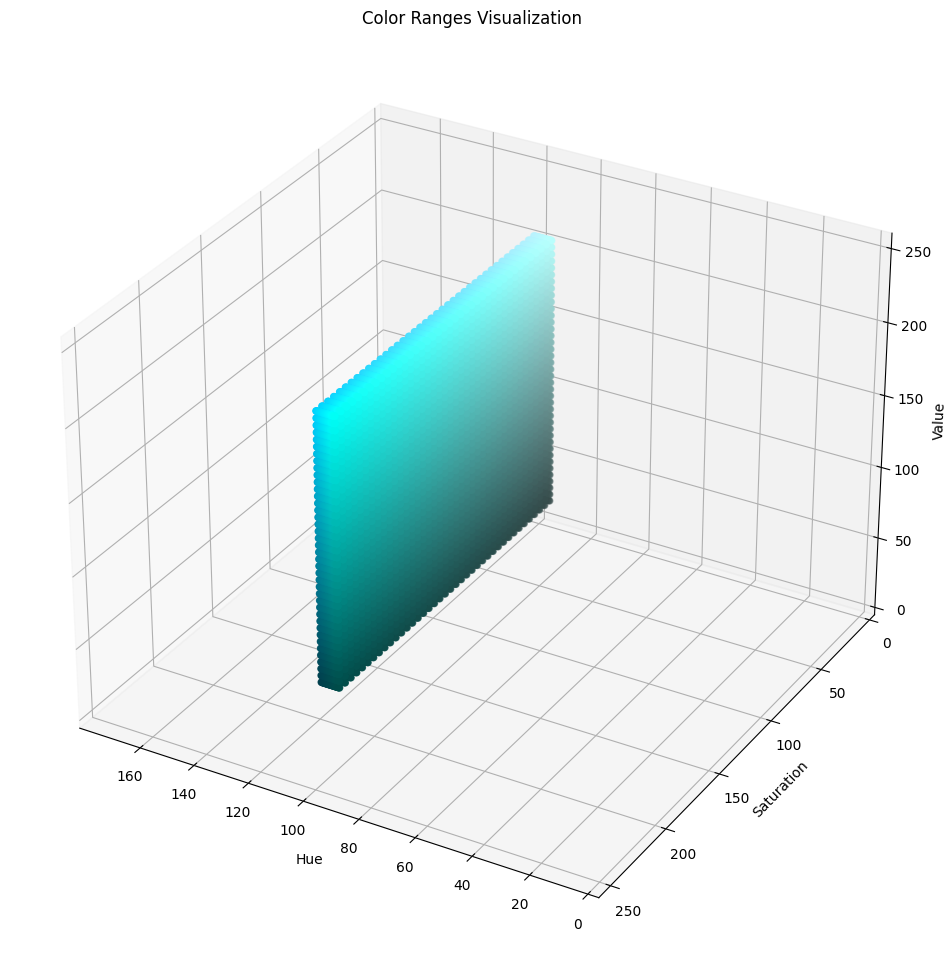

In [ ]:
plot_color_ranges('cyan', 'scatter',30,120)

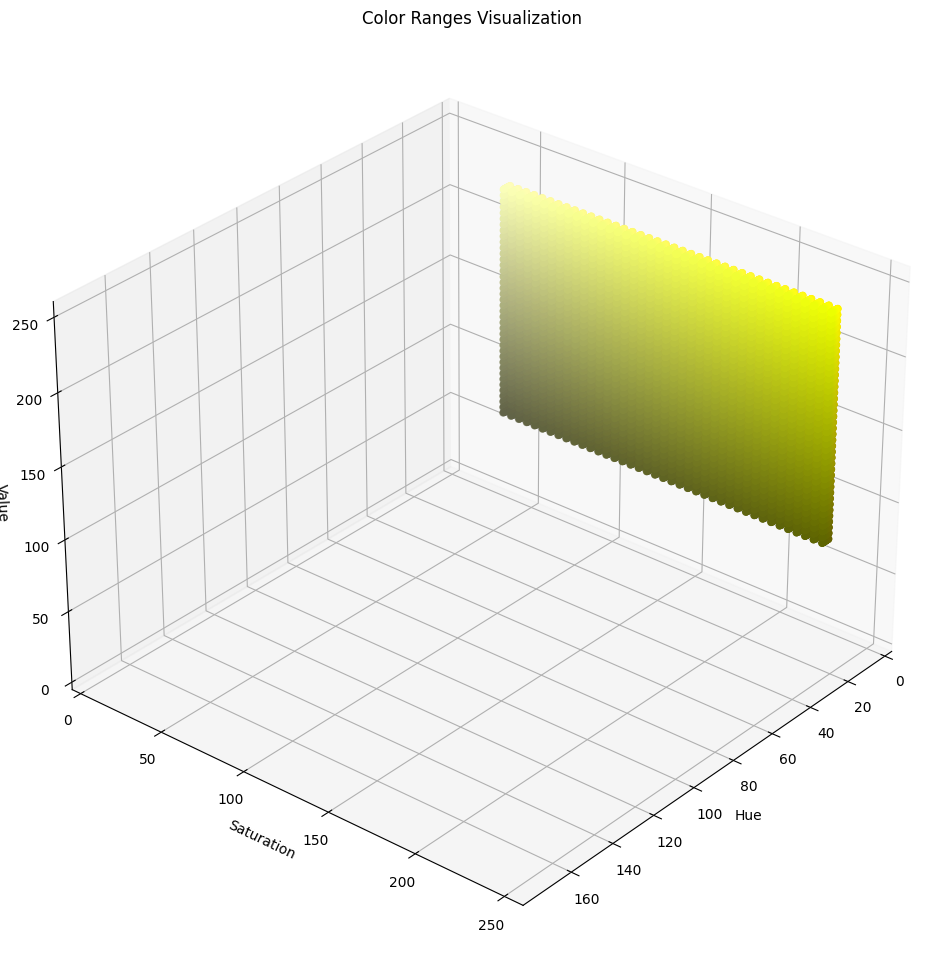

In [ ]:
plot_color_ranges('yellow', 'scatter',30,40)

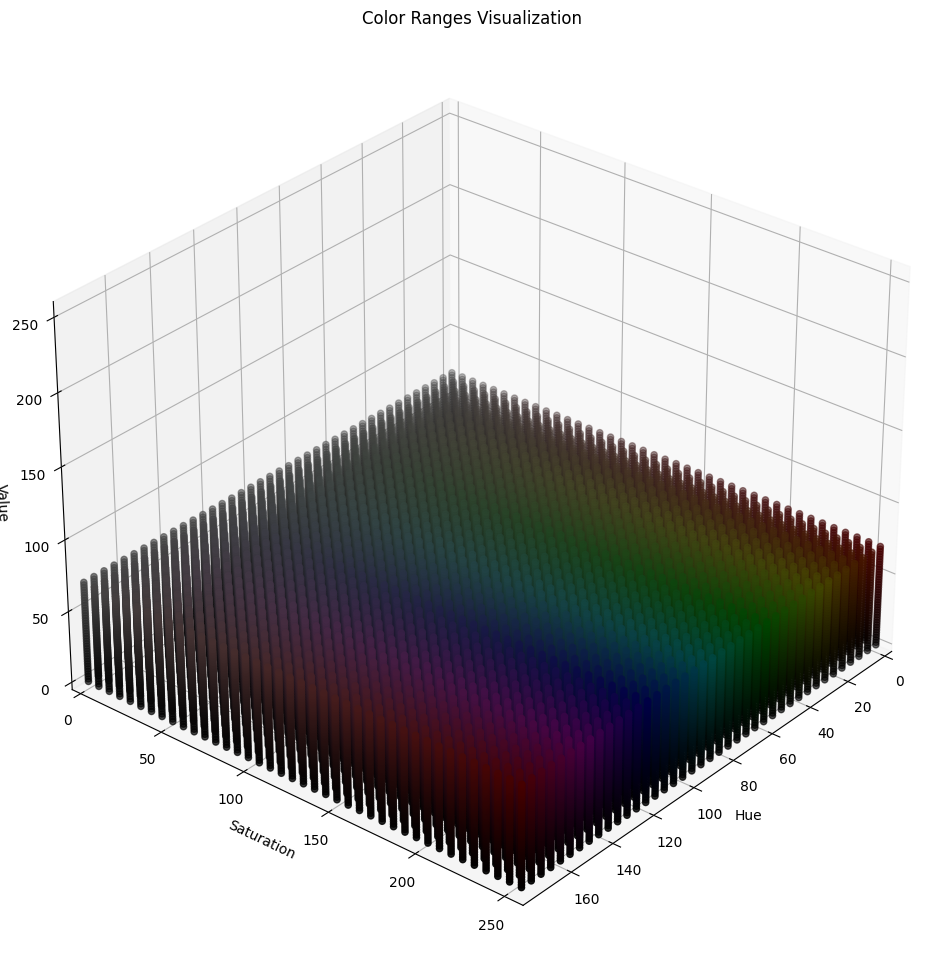

In [ ]:
plot_color_ranges('black', 'scatter',30,40)